100%|██████████| 16/16 [00:00<00:00, 24.68it/s]


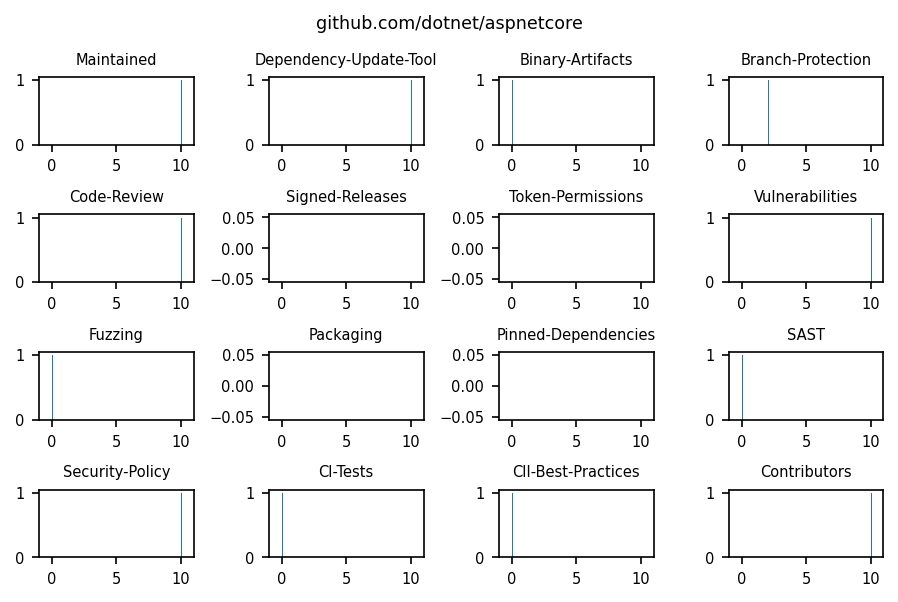

github.com/dotnet/aspnetcore (0.0, [('CI-Tests', '0 out of 30 merged PRs checked by a CI test -- score normalized to 0')])


In [5]:
import json
import pandas as pd
from util import read_star_cache, scrape_stars, show_distribution_by_check_type, show_distribution_by_single_check, plot_score_against_star, show_distribution_of_repo, view_reasons_behind_check, show_cumulative_score_distribution

terrapin_db = pd.read_csv("./data/terrapin.csv")
terrapin_ref = pd.read_csv("./data/terrapin_reference.csv")

with open("./terrapin-scores.json") as f:
    terrapin_scorecards = json.load(f)
terrapin_data = [x for x in terrapin_scorecards.values() if x is not None]
#scrape_stars(terrapin_data)
star_cache = read_star_cache()
terrapin_data = sorted(terrapin_data, key=lambda x: star_cache[x["repo"]["name"]], reverse=True)
#plot_score_against_star([r["score"] for r in terrapin_data], [star_cache[r["repo"]["name"]] for r in terrapin_data])

#print("# terrapin repos:", len(terrapin_data))

top_n = 100
#print(f"scores of top {top_n}:", [(r["repo"]["name"], r["score"]) for r in terrapin_data if "microsoft" in r["repo"]["name"]])


#show_distribution_by_check_type(terrapin_data, f"Terrapin Repos (N={len(terrapin_data)})")
#check_scores = show_distribution_of_repo("github.com/dotnet/aspnetcore", terrapin_data)
check_scores = show_distribution_of_repo("github.com/dotnet/aspnetcore", terrapin_data)
view_reasons_behind_check("CI-Tests", check_scores)


In [52]:
from collections import Counter

name_to_repo_name = { r["Name"].lower(): r["SrcRepo"].lower() for _, r in terrapin_db.iterrows() if isinstance(r["SrcRepo"], str) }
print(Counter(terrapin_ref["Risk Level"]))
print(len(terrapin_db), "down to ",len(name_to_repo_name))
terrapin_ref["SrcRepo"] = terrapin_ref["Name"].str.lower().apply(lambda x: name_to_repo_name.get(x, "NOT FOUND"))
terrapin_ref = terrapin_ref[terrapin_ref["Maintainer"] != "NugetTestAccount"]
terrapin_ref = terrapin_ref[terrapin_ref["SrcRepo"] != "NOT FOUND"]
print(Counter(terrapin_ref["Risk Level"]))

def get_repo_by_risk_level(risk_level):
    risk_repo_list = terrapin_ref[terrapin_ref["Risk Level"] == risk_level]["SrcRepo"].str.lower().tolist()
    risk_repos = [x for x in terrapin_data if x["repo"]["name"].replace("github.com/", "") in risk_repo_list]
    print(len(risk_repo_list), len(risk_repos))
    return risk_repos

high_risk_repos = get_repo_by_risk_level("High")
med_risk_repos = get_repo_by_risk_level("Medium")
low_risk_repos = get_repo_by_risk_level("Low")


Counter({'High': 14430})
72734 down to  8345
Counter({'High': 8350})
8350 519
0 0
0 0
